In [1]:
import pandas as pd

# Load the CSV file
file_path = 'Sentiment.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Inspect the column names
print(data.columns)


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


In [2]:
# Clean the 'reviews.text' column
data['cleaned_text'] = data['reviews.text'].str.replace(r'http\S+|www\S+|https\S+', '', case=False)  # Remove URLs
data['cleaned_text'] = data['cleaned_text'].str.replace(r'[^A-Za-z0-9 ]+', '', case=False)  # Remove special characters

# You can also remove extra spaces and convert the text to lowercase
data['cleaned_text'] = data['cleaned_text'].str.lower().str.strip()

# Optionally, check the cleaned text
print(data[['reviews.text', 'cleaned_text']].head())


                                        reviews.text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                        cleaned_text  
0  i initially had trouble deciding between the p...  
1  allow me to preface this with a little history...  
2  i am enjoying it so far. great for reading. ha...  
3  i bought one of the first paperwhites and have...  
4  i have to say upfront - i don't like coroporat...  


In [3]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

# Download necessary NLTK data (only the first time)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to process the text (tokenization, stop-word removal, and lemmatization/stemming)
def process_text(text, use_stemming=True):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words and punctuation
    tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

    # Apply stemming or lemmatization
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    else:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization

    # Join the tokens back into a cleaned string
    return ' '.join(tokens)

# Apply text processing to the 'cleaned_text' column
data['processed_text'] = data['cleaned_text'].apply(lambda x: process_text(x, use_stemming=True))

# Inspect the first few rows to check the processed text
print(data[['cleaned_text', 'processed_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                        cleaned_text  \
0  i initially had trouble deciding between the p...   
1  allow me to preface this with a little history...   
2  i am enjoying it so far. great for reading. ha...   
3  i bought one of the first paperwhites and have...   
4  i have to say upfront - i don't like coroporat...   

                                      processed_text  
0  initi troubl decid paperwhit voyag review less...  
1  allow prefac littl histori casual reader own n...  
2  enjoy far great read origin fire sinc 2012. fi...  
3  bought one first paperwhit pleas constant comp...  
4  say upfront n't like coropor hermet close stuf...  


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features to 5000 words

# Fit and transform the processed text data into numerical features
X = vectorizer.fit_transform(data['processed_text'])

# Convert the sparse matrix to a DataFrame for better readability (optional)
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF features
print(X_df.head())


         00  000   04   07   08  0x0   10  100  1000  1000ma  ...   yr  \
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  ...  0.0   
1  0.105425  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  ...  0.0   
2  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  ...  0.0   
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  ...  0.0   
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  ...  0.0   

   zarathustra  zen  zero  zink  zip  zippi  zombies  zoom  zumi  
0          0.0  0.0   0.0   0.0  0.0    0.0      0.0   0.0   0.0  
1          0.0  0.0   0.0   0.0  0.0    0.0      0.0   0.0   0.0  
2          0.0  0.0   0.0   0.0  0.0    0.0      0.0   0.0   0.0  
3          0.0  0.0   0.0   0.0  0.0    0.0      0.0   0.0   0.0  
4          0.0  0.0   0.0   0.0  0.0    0.0      0.0   0.0   0.0  

[5 rows x 4955 columns]


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Label Encoding (assuming 'reviews.rating' column is the sentiment label)
# You can modify this part depending on your label column
label_encoder = LabelEncoder()
data['encoded_sentiment'] = label_encoder.fit_transform(data['reviews.rating'].apply(lambda x: 'positive' if x >= 4 else 'negative'))

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, data['encoded_sentiment'], test_size=0.2, random_state=42)

# Step 3: Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7188
Confusion Matrix:
[[ 77  41]
 [ 49 153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       118
           1       0.79      0.76      0.77       202

    accuracy                           0.72       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.72      0.72      0.72       320



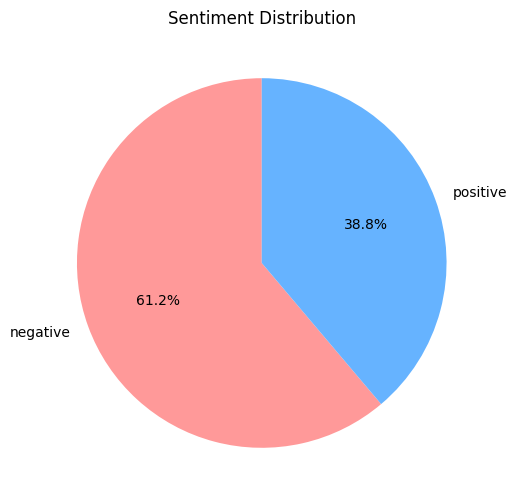

In [7]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution (positive vs. negative)
sentiment_counts = data['encoded_sentiment'].value_counts()
sentiment_labels = label_encoder.classes_  # Get the sentiment labels (e.g., 'positive', 'negative')

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Sentiment Distribution")
plt.show()


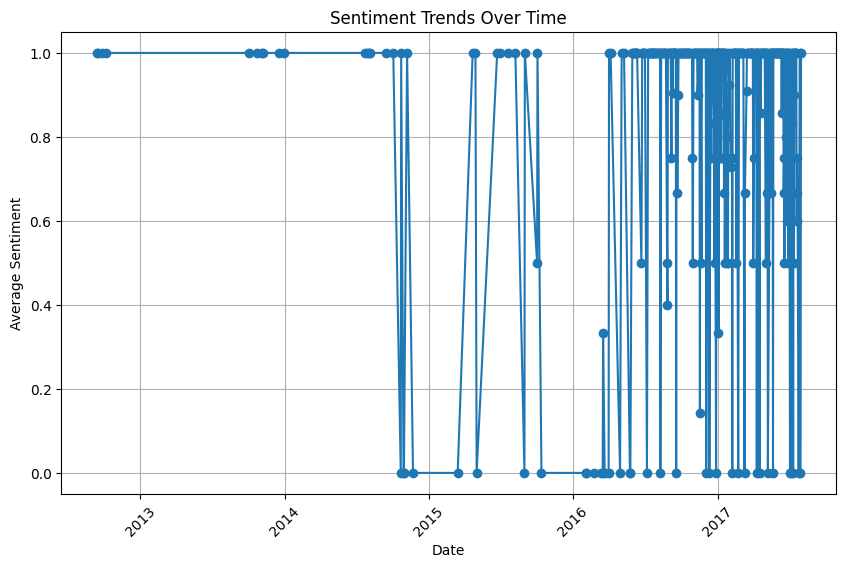

In [8]:
# Convert the 'reviews.date' to datetime format
data['reviews.date'] = pd.to_datetime(data['reviews.date'], errors='coerce')

# Add sentiment as a numeric value for easy plotting
data['sentiment'] = data['encoded_sentiment'].map({0: 'negative', 1: 'positive'})

# Group by date and calculate the mean sentiment for each date
sentiment_trends = data.groupby('reviews.date')['encoded_sentiment'].mean()

# Plot sentiment trends over time
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trends.index, sentiment_trends.values, marker='o', color='tab:blue')
plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


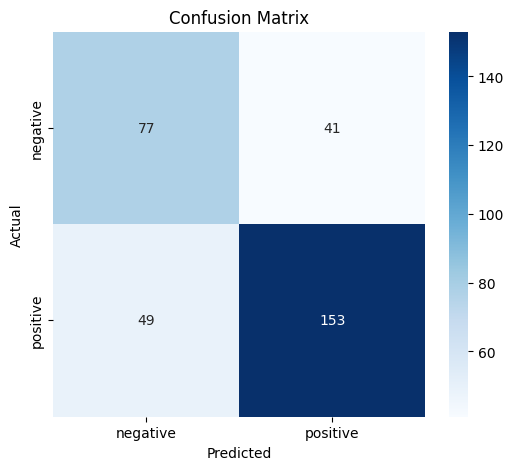

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Assume X_train and y_train are pandas DataFrame and Series respectively

# Convert to numpy if they are pandas objects
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

# Set up parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # Regularization type (l1 or l2)
    'solver': ['liblinear']  # Solver for optimization (liblinear is efficient for small datasets)
}

# Initialize GridSearchCV with Logistic Regression
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_optimized = best_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

print(f"Optimized Accuracy: {accuracy_optimized:.4f}")


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Optimized Accuracy: 0.7125


c:\Users\parth\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [13]:
# Install necessary libraries
#!pip install tensorflow scikit-learn pandas

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Example data (replace with your actual data)
# Assuming 'data' is a DataFrame with 'processed_text' (cleaned text) and 'encoded_sentiment' (labels)
data = pd.DataFrame({
    'processed_text': ['This is a great product!', 'I hate this product', 'Best purchase ever', 'Not good at all'],
    'encoded_sentiment': [1, 0, 1, 0]  # 1 for positive, 0 for negative sentiment
})

# Tokenize the text (convert words to integers)
tokenizer = Tokenizer(num_words=5000)  # Limit to 5000 most frequent words
tokenizer.fit_on_texts(data['processed_text'])

# Convert the text into sequences of integers
X_seq = tokenizer.texts_to_sequences(data['processed_text'])

# Pad the sequences to ensure they are of equal length
X_padded = pad_sequences(X_seq, padding='post', maxlen=100)

# Check the shape of the padded data
print(f"Padded sequence shape: {X_padded.shape}")

# Split the data into training and test sets
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_padded, data['encoded_sentiment'], test_size=0.2, random_state=42)

# Verify the split
print(f"Training set shape: {X_train_dl.shape}, {y_train_dl.shape}")
print(f"Test set shape: {X_test_dl.shape}, {y_test_dl.shape}")


ModuleNotFoundError: No module named 'tensorflow'